In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# fetch data 

cereal_data = pd.read_csv('Datasets/cereal.csv')

cereal_data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.00,5.00,6,280,25,3,1.00,0.33,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2.00,8.00,8,135,0,3,1.00,1.00,33.98
2,All-Bran,K,C,70,4,1,260,9.00,7.00,5,320,25,3,1.00,0.33,59.43
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.00,8.00,0,330,25,3,1.00,0.50,93.70
4,Almond Delight,R,C,110,2,2,200,1.00,14.00,8,-1,25,3,1.00,0.75,34.38


In [3]:
Kval = 8 # Number of clusters

cereal_data.isna().sum()


name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [4]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [5]:
# correl = subset_data.corr()
correl = cereal_data.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [6]:
cereal_data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [7]:
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
subset_data = pd.DataFrame(sc.fit_transform(cereal_data[cols]), columns = cereal_data[cols].columns, index = cereal_data.index)

In [8]:
subset_data.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,-1.91,1.34,-0.01,-0.36,3.31,-2.26,-0.21,2.60,-0.15,0.96,-0.20,-2.12,1.84
1,0.68,0.42,3.99,-1.74,-0.06,-1.55,0.24,0.55,-1.27,0.96,-0.20,0.77,-0.62
2,-1.91,1.34,-0.01,1.20,2.89,-1.79,-0.44,3.16,-0.15,0.96,-0.20,-2.12,1.20
3,-2.94,1.34,-1.01,-0.24,5.00,-1.55,-1.57,3.30,-0.15,0.96,-0.20,-1.39,3.66
4,0.16,-0.50,0.99,0.48,-0.49,-0.14,0.24,-1.37,-0.15,0.96,-0.20,-0.31,-0.59


In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = Kval, 
           init = 'random', 
           n_init = 10, 
           max_iter = 500, 
           tol = 1e-04, 
           random_state = 50)
data_km = pd.DataFrame(km.fit_predict(subset_data), index = subset_data.index)

In [10]:
data_km.head()

,0
0,0
1,2
2,0
3,0
4,1


In [11]:
data_km.rename(columns = {0:'cluster'}, inplace = True)
data_km = data_km.merge(cereal_data[['name', 'mfr', 'rating', 'carbo']], left_index = True, right_index = True)
data_km.head()

,cluster,name,mfr,rating,carbo
0,0,100% Bran,N,68.40,5.00
1,2,100% Natural Bran,Q,33.98,8.00
2,0,All-Bran,K,59.43,7.00
3,0,All-Bran with Extra Fiber,K,93.70,8.00
4,1,Almond Delight,R,34.38,14.00


In [12]:
pd.set_option('display.max_rows', None)
data_km.sort_values(by = ['cluster'])

,cluster,name,mfr,rating,carbo
0,0,100% Bran,N,68.40,5.00
2,0,All-Bran,K,59.43,7.00
3,0,All-Bran with Extra Fiber,K,93.70,8.00
24,1,Froot Loops,K,32.21,11.00
25,1,Frosted Flakes,K,31.44,14.00
29,1,Fruity Pebbles,P,28.03,13.00
30,1,Golden Crisp,P,35.25,11.00
31,1,Golden Grahams,G,23.80,15.00
35,1,Honey Graham Ohs,Q,21.87,12.00
36,1,Honey Nut Cheerios,G,31.07,11.50


In [13]:
plot_data = []
for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x= df['rating'], y= df['carbo'], text=df["name"], name = 'cluster ' + str(clus), mode = 'markers'))

layout = go.Layout(xaxis = dict(title='rating'), yaxis = dict(title= 'carbo'), 
                   title = 'Clustering')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)
    
    

# plt.plot(data_km['cluster'],data_km['rating'], 'ro', alpha = 0.5)
# for i in range(len(data_km)):
#     plt.text(data_km.loc[i]['cluster'], data_km.loc[i]['rating'], str(i)) # cereal_data['name']) # 

# plt.show()

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_pca = pd.DataFrame(pca.fit_transform(subset_data), index = subset_data.index)

In [15]:
data_km = data_km.merge(data_pca, left_index = True, right_index = True)
data_km.head()

,cluster,name,mfr,rating,carbo,0,1
0,0,100% Bran,N,68.40,5.00,5.53,-1.81
1,2,100% Natural Bran,Q,33.98,8.00,0.26,-1.81
2,0,All-Bran,K,59.43,7.00,4.89,-2.09
3,0,All-Bran with Extra Fiber,K,93.70,8.00,7.74,-0.67
4,1,Almond Delight,R,34.38,14.00,-1.15,-0.22


In [16]:
plot_data = []
for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x= df[0], y= df[1], text=df["name"], name = 'cluster ' + str(clus), mode = 'markers'))

layout = go.Layout(xaxis = dict(title='PCA First'), yaxis = dict(title= 'PCA Second'), 
                   title = 'Clustering')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

KMeans(max_iter=500, n_clusters=13, random_state=50)

KMeans(max_iter=500, n_clusters=14, random_state=50)

KMeans(max_iter=500, n_clusters=15, random_state=50)

KMeans(max_iter=500, n_clusters=16, random_state=50)

KMeans(max_iter=500, n_clusters=17, random_state=50)

KMeans(max_iter=500, n_clusters=18, random_state=50)

KMeans(max_iter=500, n_clusters=19, random_state=50)

KMeans(max_iter=500, n_clusters=20, random_state=50)

KMeans(max_iter=500, n_clusters=21, random_state=50)

KMeans(max_iter=500, n_clusters=22, random_state=50)

KMeans(max_iter=500, n_clusters=23, random_state=50)

KMeans(max_iter=500, n_clusters=24, random_state=50)

KMeans(max_iter=500, n_clusters=25, random_state=50)

KMeans(max_iter=500, n_clusters=26, random_state=50)

KMeans(max_iter=500, n_clusters=27, random_state=50)

KMeans(max_iter=500, n_clusters=28, random_state=50)

KMeans(max_iter=500, n_clusters=29, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

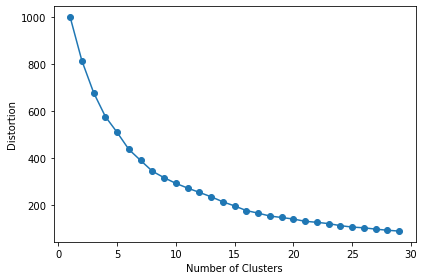

In [17]:
distortions = []
for i in range(1, 30): 
    km = KMeans(n_clusters = i, 
           init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
           n_init = 10, 
           max_iter = 500, 
           # tol = 1e-04, 
           random_state = 50)
    km.fit(subset_data)
    distortions.append(km.inertia_)
plt.plot(range(1,30), distortions, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()